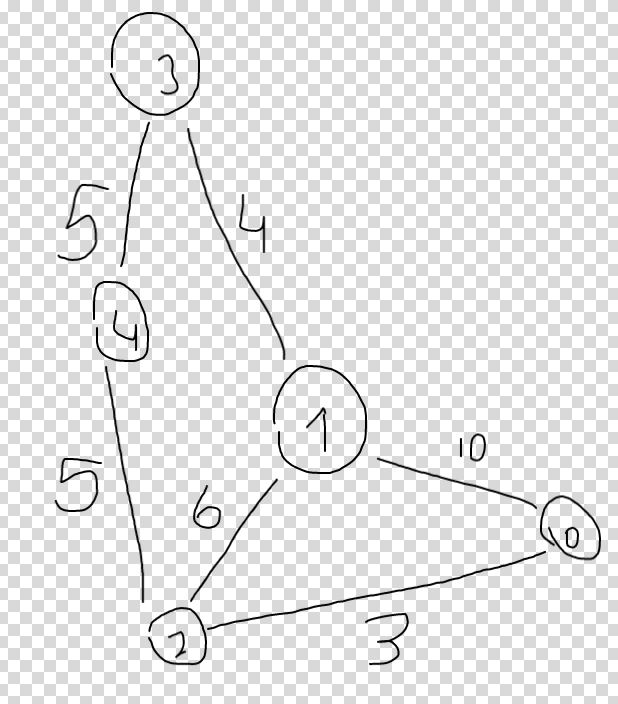

In [1]:
from PIL import Image
Image.open("projectsketch.JPG")

In [2]:
class Edge:
    def __init__(self, target, cost):
        self.target = target
        self.weight = cost
        
edge = Edge(3, 4)
print(edge.target, " ", edge.weight)

3   4


In [3]:
'''
Dijkstra's algorithm will initially start with infinite distances and will try to improve them step by step.

Mark all nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.

Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes. The tentative distance of a node v is the length of the shortest path discovered so far between the node v and the starting node.

Since initially no path is known to any other vertex than the source itself (which is a path of length zero), all other tentative distances are initially set to infinity. 

Set the initial node as current.

For the current node, consider all of its unvisited neighbors and calculate their tentative distances through the current node.

Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. 

When we are done considering all of the unvisited neighbors of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again.

'''

"\nDijkstra's algorithm will initially start with infinite distances and will try to improve them step by step.\n\nMark all nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.\n\nAssign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes. The tentative distance of a node v is the length of the shortest path discovered so far between the node v and the starting node.\n\nSince initially no path is known to any other vertex than the source itself (which is a path of length zero), all other tentative distances are initially set to infinity. \n\nSet the initial node as current.\n\nFor the current node, consider all of its unvisited neighbors and calculate their tentative distances through the current node.\n\nCompare the newly calculated tentative distance to the current assigned value and assign the smaller one. \n\nWhen we are done considering all of the unvisited neighbors of the current node, ma

In [4]:
import sys
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx #for create graph
import pandas as pd
import numpy as np

In [5]:
#Find minumum distance, start from 0 and (for) loop . If distance of vertex lower than min and not visited yet set it minimum. Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes.
#The tentative distance of a node v is the length of the shortest path discovered so far between the node v and the starting node.
# In here, we set min to maxsize because we dont know distances between nodes.
def minIndex(distance, visited, n):
    min = sys.maxsize
    index = 0
    for v in range(n):
        if(distance[v] < min and visited[v] == False):
            min = distance[v]
            index = v
    return index

In [6]:
def shorthestPaths(startVertex, edges):
    visited = [False] * len(edges)
    distance = [sys.maxsize] * len(edges) #sys.maxsize represent infinitive, max distance
    distance[startVertex] = 0
    n = len(edges)
    for i in range(n-1):
        u = minIndex(distance, visited, n)
        visited[u] = True
        for  e in edges[u]:
            target = e.target
            distSum = distance[u] + e.weight
            distance[target] = min(distance[target],distSum)

    return distance

    #indexes starting from 0 in python thats why we range it n-1 
    #There are 6 edges so 0-1-2-3-4-5 otherwise it had 7 edges
    #

In [7]:
def readRouters():
    adjlist = defaultdict(list)
    with open("routers1.csv", newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            src = int(row['router'])
            dest = int(row['destination'])
            weight = int(row['distance'])
            adjlist[src].append(Edge(dest, weight))
            adjlist[dest].append(Edge(src, weight))
    return adjlist

    #Reading from .csv file starting nodes, destination nodes and distance between these nodes.

In [8]:
#Project changed from manually list to matrix for 2nd review
adjacencyMatrix = [
  [0, 10, 3, 0, 0],
  [10, 0, 6, 4, 0],
  [3, 6, 0, 0, 5],
  [0, 4, 0, 0, 5],
  [0, 0, 5, 5, 0]
]

adjlist = defaultdict(list)

for source in range(len(adjacencyMatrix[0])):
  row = adjacencyMatrix[source]
  for destination in range(len(row)):
    weight = row[destination]
    adjlist[source].append(Edge(destination,weight))
    

# adjlist = defaultdict(list)
# adjlist[0].append(Edge(1,10))
# adjlist[0].append(Edge(2,3))
# adjlist[1].append(Edge(0,10))
# adjlist[1].append(Edge(2,6))
# adjlist[1].append(Edge(3,4))
# adjlist[2].append(Edge(0,3))
# adjlist[2].append(Edge(1,6))
# adjlist[3].append(Edge(1,4))

In [9]:
vertex = 0
adjlist = readRouters()
"""for edge in adjlist[vertex]:
    print('Vertex:', vertex, 'Target:',edge.target, "Weight:",edge.weight)"""

for k in adjlist.keys():
    distance = shorthestPaths(k, adjlist)
    for i in adjlist.keys():
        print("Vertex:(", k , ") to vertex : (", i, ") = ", distance[i])

#All vertex distance to each other
#

Vertex:( 0 ) to vertex : ( 0 ) =  0
Vertex:( 0 ) to vertex : ( 1 ) =  9
Vertex:( 0 ) to vertex : ( 2 ) =  3
Vertex:( 0 ) to vertex : ( 3 ) =  13
Vertex:( 0 ) to vertex : ( 4 ) =  8
Vertex:( 1 ) to vertex : ( 0 ) =  9
Vertex:( 1 ) to vertex : ( 1 ) =  0
Vertex:( 1 ) to vertex : ( 2 ) =  6
Vertex:( 1 ) to vertex : ( 3 ) =  4
Vertex:( 1 ) to vertex : ( 4 ) =  9
Vertex:( 2 ) to vertex : ( 0 ) =  3
Vertex:( 2 ) to vertex : ( 1 ) =  6
Vertex:( 2 ) to vertex : ( 2 ) =  0
Vertex:( 2 ) to vertex : ( 3 ) =  10
Vertex:( 2 ) to vertex : ( 4 ) =  5
Vertex:( 3 ) to vertex : ( 0 ) =  13
Vertex:( 3 ) to vertex : ( 1 ) =  4
Vertex:( 3 ) to vertex : ( 2 ) =  10
Vertex:( 3 ) to vertex : ( 3 ) =  0
Vertex:( 3 ) to vertex : ( 4 ) =  5
Vertex:( 4 ) to vertex : ( 0 ) =  8
Vertex:( 4 ) to vertex : ( 1 ) =  9
Vertex:( 4 ) to vertex : ( 2 ) =  5
Vertex:( 4 ) to vertex : ( 3 ) =  5
Vertex:( 4 ) to vertex : ( 4 ) =  0


In [10]:
def draw(startNode, adjacencyMatrix, coloredNodes=[], seed=0):
        G = nx.from_numpy_matrix(np.matrix(adjacencyMatrix), create_using=nx.DiGraph)

        node_colors = ['purple'] * len(adjacencyMatrix[0])

        labels = {}
        for index in range(len(adjacencyMatrix[0])):
          labels[index] = str(index)

        for edge in G.edges():
            G[edge[0]][edge[1]]['color'] = 'black'

        edge_colors = [G[edge[0]][edge[1]]['color'] for edge in G.edges()]

        node_colors[startNode] = 'green'

        plt.figure(figsize=(7, 7))

        layout = nx.spring_layout(G, seed=seed)
        nx.draw(G, pos=layout, node_color=node_colors, edge_color=edge_colors, node_size=1000, with_labels=True, labels=labels, font_color="white")

        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_labels, font_color="red", font_size=16)

        wm = plt.get_current_fig_manager()

        plt.show()
        #For final graph enlarged and nodes added. And graph drawned

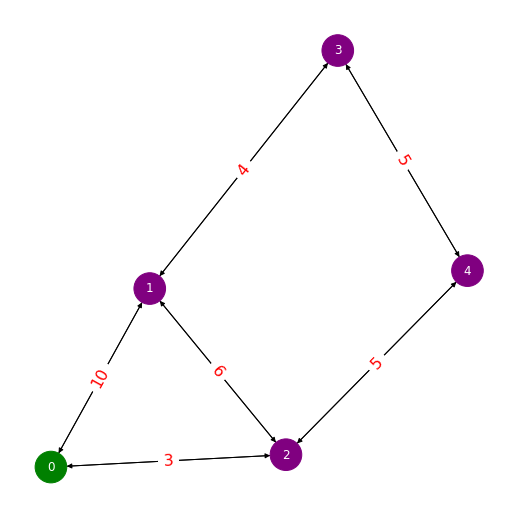

In [11]:
draw(vertex, adjacencyMatrix)

In [12]:
vertex = 0
adjlist = readRouters()
"""for edge in adjlist[vertex]:
    print('Vertex:', vertex, 'Target:',edge.target, "Weight:",edge.weight)"""

for k in adjlist.keys():
    distance = shorthestPaths(k, adjlist)
    for i in adjlist.keys():
        print("Vertex:(", k , ") to vertex : (", i, ") = ", distance[i])

Vertex:( 0 ) to vertex : ( 0 ) =  0
Vertex:( 0 ) to vertex : ( 1 ) =  9
Vertex:( 0 ) to vertex : ( 2 ) =  3
Vertex:( 0 ) to vertex : ( 3 ) =  13
Vertex:( 0 ) to vertex : ( 4 ) =  8
Vertex:( 1 ) to vertex : ( 0 ) =  9
Vertex:( 1 ) to vertex : ( 1 ) =  0
Vertex:( 1 ) to vertex : ( 2 ) =  6
Vertex:( 1 ) to vertex : ( 3 ) =  4
Vertex:( 1 ) to vertex : ( 4 ) =  9
Vertex:( 2 ) to vertex : ( 0 ) =  3
Vertex:( 2 ) to vertex : ( 1 ) =  6
Vertex:( 2 ) to vertex : ( 2 ) =  0
Vertex:( 2 ) to vertex : ( 3 ) =  10
Vertex:( 2 ) to vertex : ( 4 ) =  5
Vertex:( 3 ) to vertex : ( 0 ) =  13
Vertex:( 3 ) to vertex : ( 1 ) =  4
Vertex:( 3 ) to vertex : ( 2 ) =  10
Vertex:( 3 ) to vertex : ( 3 ) =  0
Vertex:( 3 ) to vertex : ( 4 ) =  5
Vertex:( 4 ) to vertex : ( 0 ) =  8
Vertex:( 4 ) to vertex : ( 1 ) =  9
Vertex:( 4 ) to vertex : ( 2 ) =  5
Vertex:( 4 ) to vertex : ( 3 ) =  5
Vertex:( 4 ) to vertex : ( 4 ) =  0
